## Анализ оттока пользователей фитнес-клубов «Культурист-датасаентист» 

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.

### Цель:

- провести анализ
- подготовить план действий по удержанию клиентов.

### Шаг 1. Импорт библиотек и данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

##### Выгружаем данные о посетителях

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv') 
gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


### Шаг 2. Исследовательский анализ данных (EDA).

##### Пропущенные значения

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


### Вывод

Нам представлена информация о 4 000 посетителей, по каждому из которых известно:
- 13 признаков
- целевая переменная (Churn)

Все признаки численные.
Целевая переменная не имеет временную структуру.
Пропусков в столбцах нет.
Тип данных в замене не нуждается.

##### Средние значения и стандартные отклонения

In [4]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


##### Средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

Text(0.5, 1.0, 'Распределение оттока клиентов')

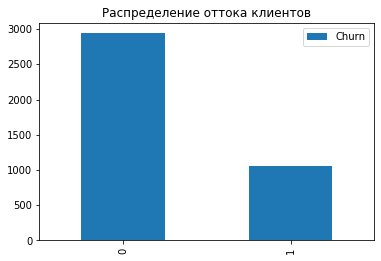

In [5]:
gym['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов')

In [6]:
gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Вывод

Среди клиентов, переставших посещать фитнес-центр:
- существенно ниже количество тех, кто пришел по акции "приведи друга" 
- абонемент они берут чаще на один месяц
- реже посещают групповые занятия
- реже пользуются другими услугами центра
- чаще не являются сотрудниками компаний-партнеров

#####  Постройте столбчатые гистограммы и распределения признаков

<Figure size 720x360 with 0 Axes>

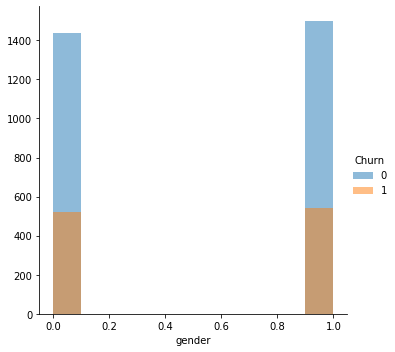

<Figure size 720x360 with 0 Axes>

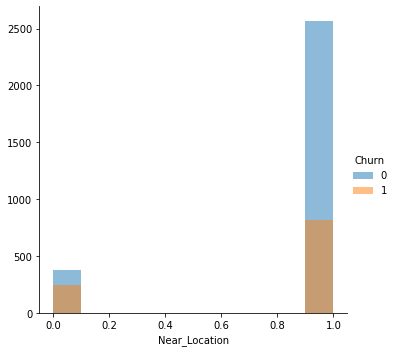

<Figure size 720x360 with 0 Axes>

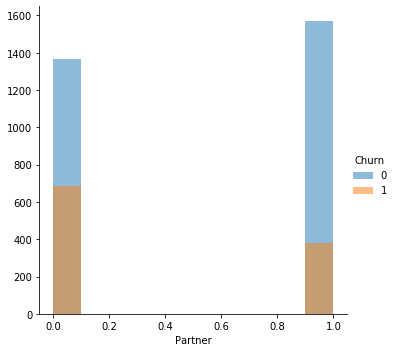

<Figure size 720x360 with 0 Axes>

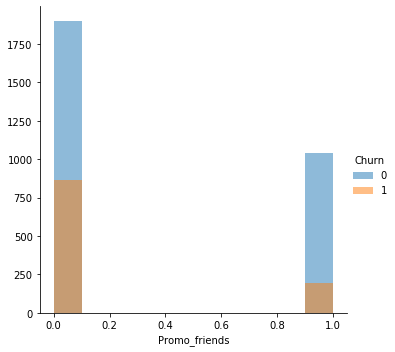

<Figure size 720x360 with 0 Axes>

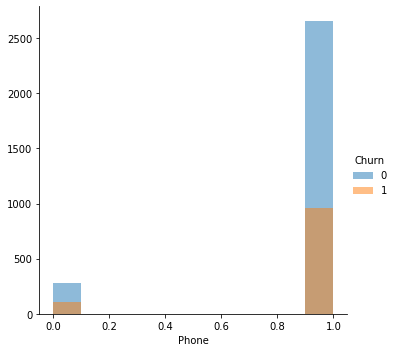

<Figure size 720x360 with 0 Axes>

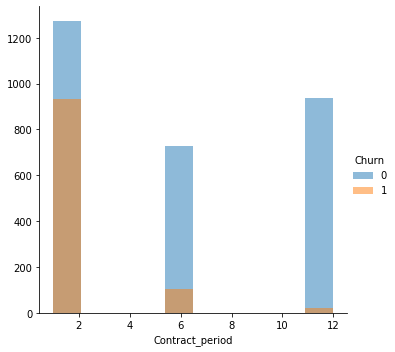

<Figure size 720x360 with 0 Axes>

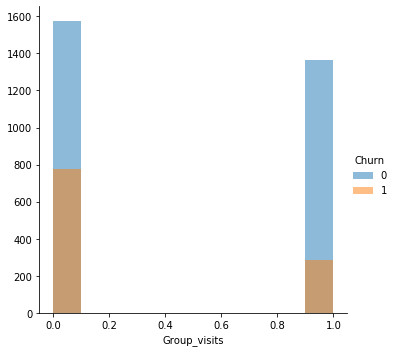

<Figure size 720x360 with 0 Axes>

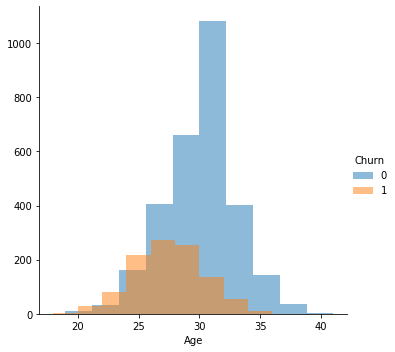

<Figure size 720x360 with 0 Axes>

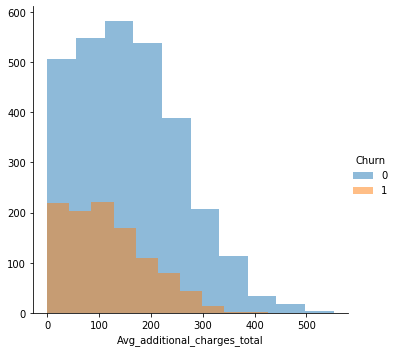

<Figure size 720x360 with 0 Axes>

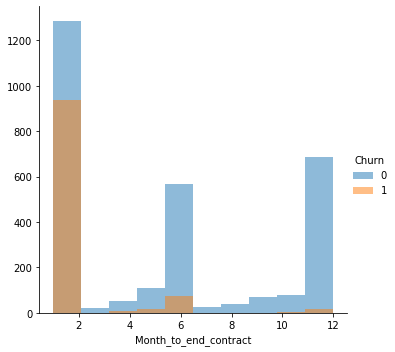

<Figure size 720x360 with 0 Axes>

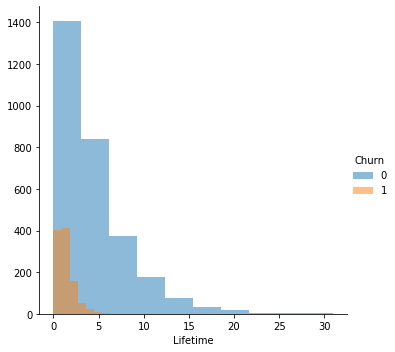

<Figure size 720x360 with 0 Axes>

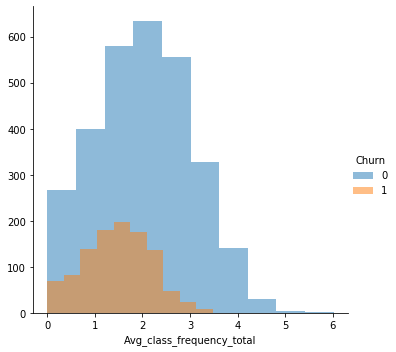

<Figure size 720x360 with 0 Axes>

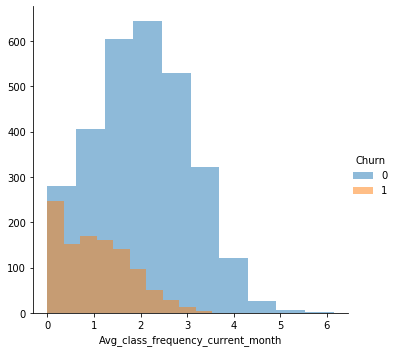

<Figure size 720x360 with 0 Axes>

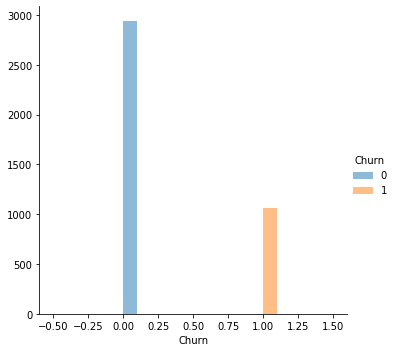

In [7]:
for col in gym.columns:
    plt.figure(figsize=(10, 5))
    g = sns.FacetGrid(gym, hue='Churn', size=5)
    g = g.map(plt.hist, col, alpha = 0.5).add_legend()
    plt.show()

### Вывод

Чаще остаются:
- сотрудники компаний партнеров
- те, чей дом или работа недалеко от центра
- посетители от 30 лет
- те, кто используют дополнительные услуги центра
- те, кто посещает центр в среднем 2  и более раз в неделю


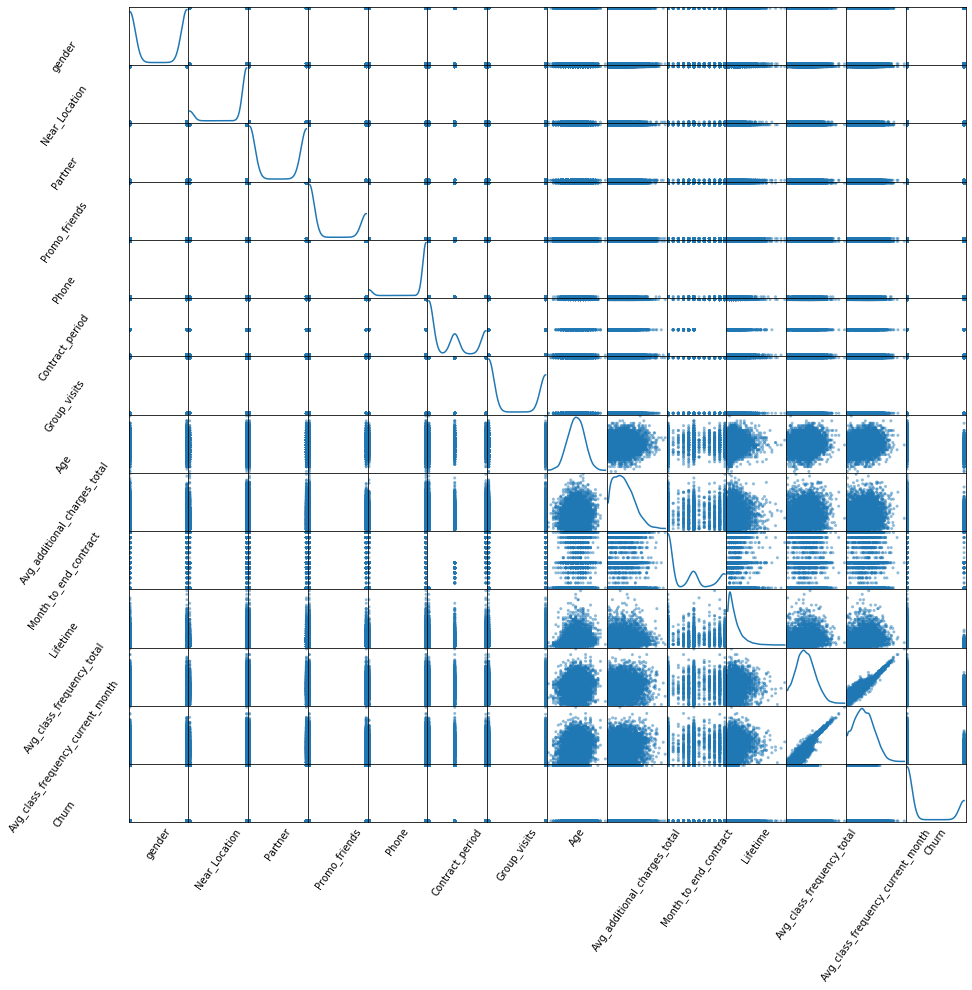

In [8]:
sm = pd.plotting.scatter_matrix(gym, figsize=(15, 15), diagonal='kde')

#ротация подписей
[s.xaxis.label.set_rotation(55) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(55) for s in sm.reshape(-1)]

#смещение подписи
[s.get_yaxis().set_label_coords(-1,0.1) for s in sm.reshape(-1)]


[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

##### Постройте матрицу корреляций и отобразите её.

In [9]:
# Вычисление матрицы корреляций
cm = gym.corr() 


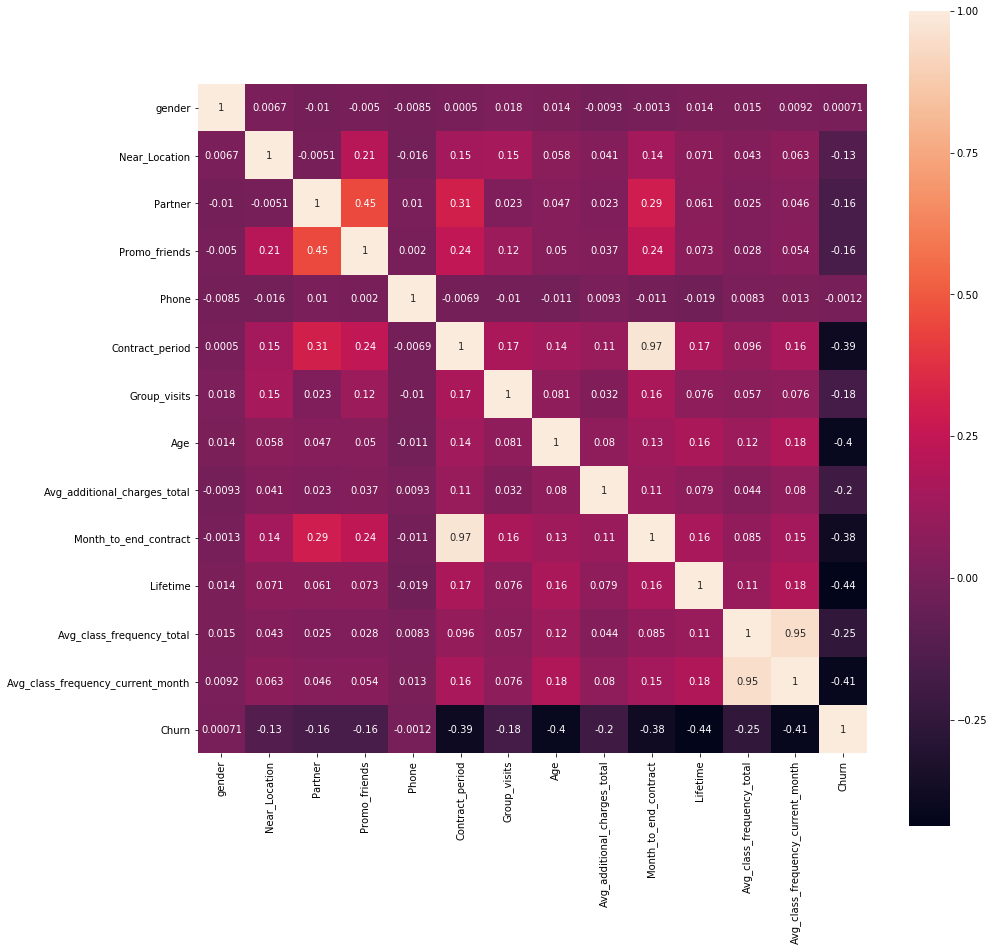

In [10]:
# Построение
plt.figure(figsize=(15, 15)) 
sns.heatmap(cm, annot = True, square=True)

### Вывод

- Каких-то ярких выбросов и перекосов по диаграммам рассеяния не наблюдается
- Сильной корреляции с целевой переменной признаки не демонстрируют 
- Существует корреляция между длительностью абонемента и сроком до окончания и между средней частотой посещений в неделю и за все время 

### Шаг 3. Постройте модель прогнозирования оттока пользователей

##### Разделение на признакии целевую переменную 

In [11]:
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

##### Разбиение данных на обучающую и валидационную выборку

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

##### Обучите модель на train-выборке любыми двумя способами логистической регрессией и случайным лесом

In [13]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))


# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state = 123)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)


# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 123)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)


##### Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [14]:
print_all_metrics(y_test, lr_predictions, title='Метрики для модели логистической регрессии:')
print_all_metrics(y_test, rf_predictions, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.81
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.79


### Вывод

- Обе модели правильно прогнозируют 92% ответов
- Доля правильных ответов среди целевого класса (отток)также одинакова и составляет 88%
- Коэффициент полноты выборки лучше у модели логистической регрессии. Она нашла больше реальных объектов целевого класса.

На основании этих трех метрик можно сделать вывод что модель логистической регрессии лучше, чем модель случайного леса.

### Шаг 4. Сделайте кластеризацию пользователей.

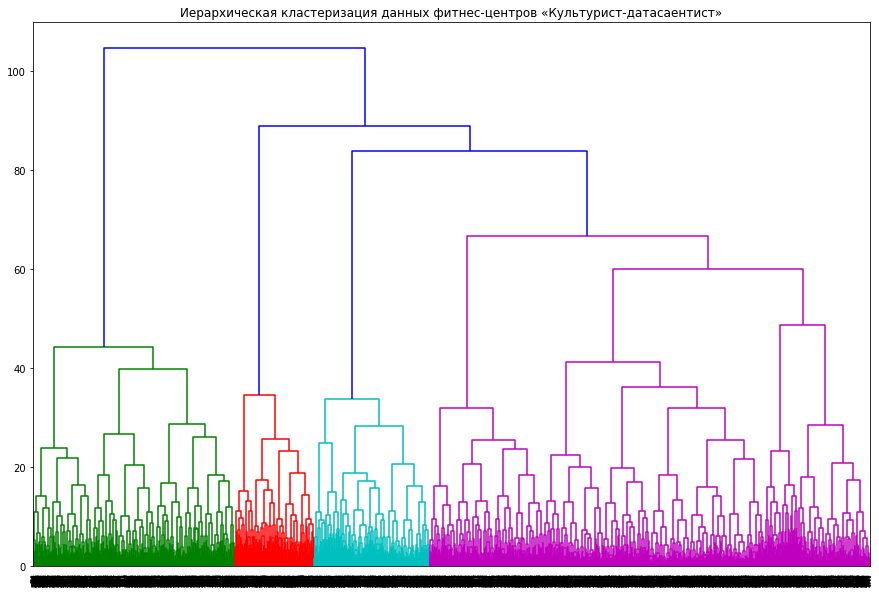

In [15]:
# Обязательная стандартизация данных перед работой с алгоритмами
X_sc = scaler.fit_transform(X)

# Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация данных фитнес-центров «Культурист-датасаентист»')
plt.show()

### Вывод

На основании полученного графика можно выделить 4 кластера.

##### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. 

In [16]:
km = KMeans(n_clusters = 4, random_state=123) # задаём число кластеров
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров

# сохраняем метки кластера в поле нашего датасета
gym['cluster_km'] = labels

##### Средние значения признаков для кластеров

In [17]:
# выводим статистику по средним значениям наших признаков по кластеру
gym.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.488829,0.756263,0.384563,0.192282,1.0,1.897089,0.292485,28.035884,129.485762,1.804333,2.231550,1.205634,0.951833,0.561273
2,0.503697,0.940850,0.778189,0.573937,1.0,10.685767,0.533272,29.896488,161.102734,9.756932,4.720887,1.991351,1.983043,0.029575
3,0.542180,0.865403,0.336493,0.200000,1.0,2.385782,0.450237,30.019905,157.864384,2.222749,4.714692,2.715630,2.702603,0.091943


### Вывод

Кластеры сильно различаются по следующим признакам:

- работа в компании-партнере
- участие в акции "приведи друга"
- длительность абонемента
- выручка от дополнительных услуг
- факт оттока
- в кластере "0" все, кто не указал телефон


##### Постройте распределения признаков для кластеров

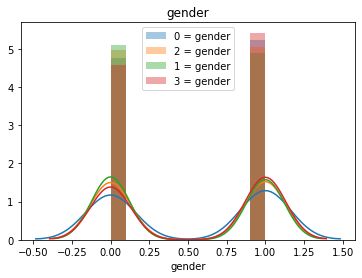

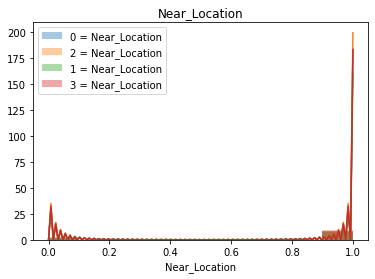

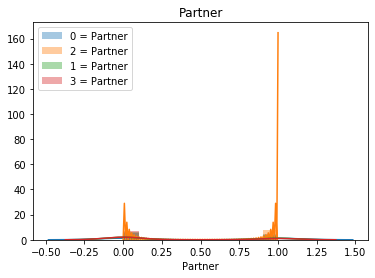

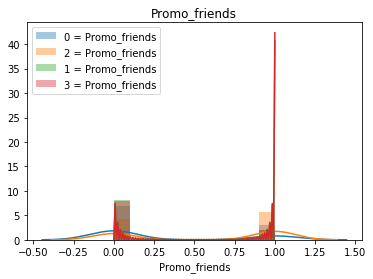

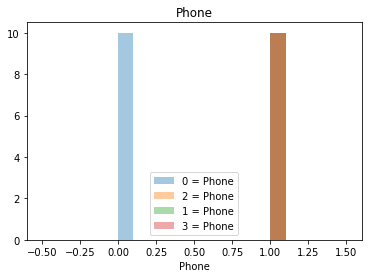

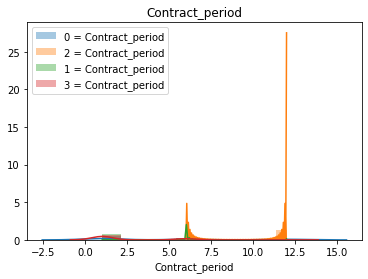

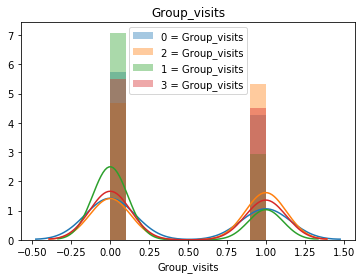

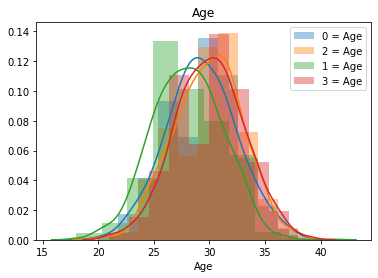

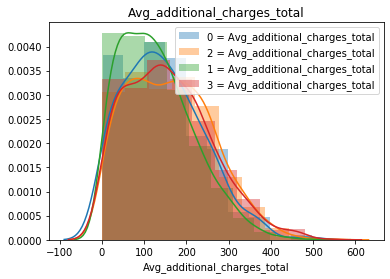

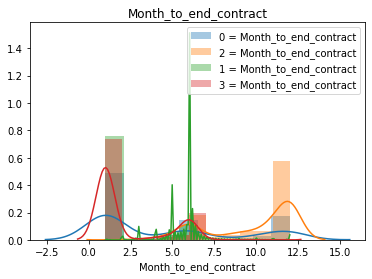

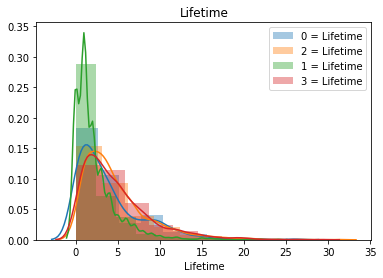

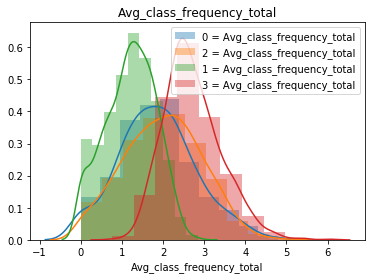

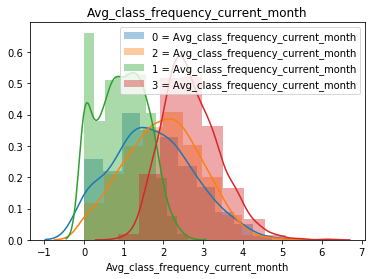

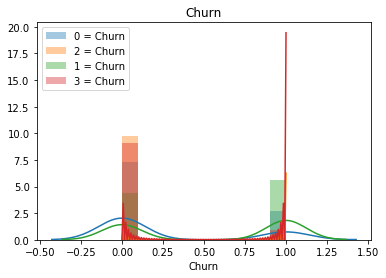

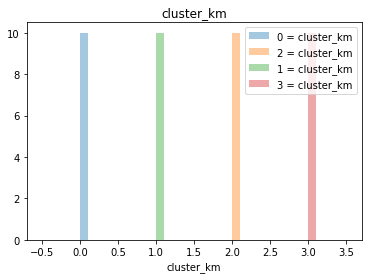

In [18]:
def plot_hist_for_all_features(data, target_column, all_columns):
    for column in all_columns:
        for churn_type in data[target_column].unique():
            sns.distplot(data[data[target_column]==churn_type][column],
                         label='{} = {}'.format(churn_type, str(column)), bins = 10)
        plt.Figure(figsize= (25,10))
        plt.title(column)
        plt.legend()
        plt.show()
        
        
plot_hist_for_all_features(gym, 'cluster_km', gym.columns)

### Вывод

Можно выделить следующие различия по кластерам:

- Во 2 и 3 кластере в основном посетители проживающие или работающие недалеко от центра.
- Во 2 кластере в основном сотрудники компаний-партнеров.
- В 3 кластере в основном участники акции "приведи друга".
- В 0 кластере посетители, не указавшие телефон.
- Во 2 кластере в основном владельцы абонементов на год.
- В 1 кластере в основном более молодые посетители, реже посещающие групповые занятия и центр в целом.
- В 1 кластере в основном те, кто посещает зал 1-2 месяца.
- В 1 кластере в основном посетители, которые не пользуются дополнительными услугами.

##### Доля оттока для каждого полученного кластера 

In [19]:
cluster_сhurn=gym.groupby('cluster_km')['Churn'].agg(['sum','count'])
cluster_сhurn.columns =['ушли', 'всего']
cluster_сhurn['%']=round(cluster_сhurn['ушли']/cluster_сhurn['всего']*100)
cluster_сhurn

,ушли,всего,%
cluster_km,,,
0,103,386,27.0
1,829,1477,56.0
2,32,1082,3.0
3,97,1055,9.0


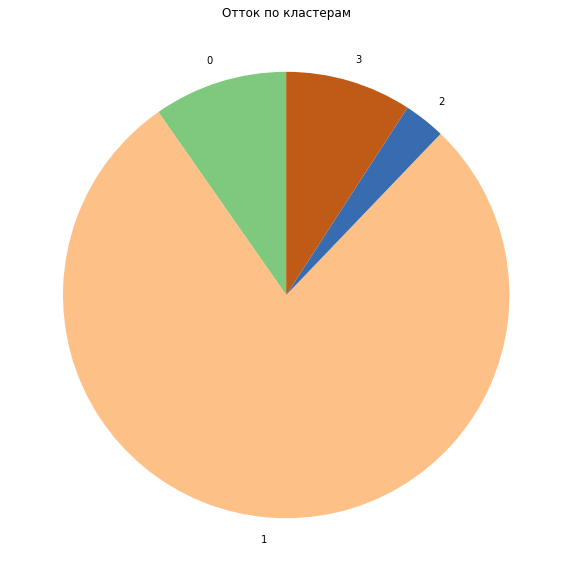

In [20]:
labels = cluster_сhurn.index
sizes = cluster_сhurn['ушли']

fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.axis('equal') 
plt.title('Отток по кластерам')
theme = plt.get_cmap("Accent")
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1.pie(sizes, labels=labels, startangle=90) 

plt.show()

### Вывод

- Большая доля оттока наблюдается в 1 кластере (56% от всех посетителей в этом кластере)
- 2 и 3 кластеры показали наименьший процент оттока (3 и 9 процентов соответственно)
- Посетителей в 0 кластере можно назвать "средненькими"

### Общий вывод

#### В ходе работы был проведен исследовательский анализ данных, построены 2 модели прогнозирования оттока пользователей и проведена кластеризация пользователей.

- При 2-х совпавших значениях метрик и на основании коэффициента полноты выборки можно сделать вывод что модель логистической регрессии лучше предсказывает отток, чем модель случайного леса.
- На основании представленных данных о посетителях оптимальное количество кластеров - 4.

#### По итогам анализа представленных данных можно сказать:

- Реже перестают пользоваться услугами фитнес-центров посетители, выработавшие лояльность (пользуются дополнительными услугами и групповыми занятиями) и попавшие в акции (приведи друга, партнерская программа).
- Также чаще продолжают посещать центр:
    - посетители от 30 лет
    - с длительностью абонемента от 6 месяцев
    - те, чей дом или работа недалеко от центра
    - те, кто посещает центр в среднем 2 и более раз в неделю
    
    
- Чаще перестают посещать фитнес-центр:
    - посетители не попавшие в партнерские программы и акции
    - с длительностью абонемента 1 месяц
    - реже использующие групповые занятия и дополнительные услуги
    - реже посещающие фитнес-центр в целом (1-2 раза в среднем в неделю)

#### Возможные рекомендации:
- запуск программы лояльности, возможно с нематериальными вознаграждениями
- продолжение программы приведи друга с возможными плавающими скидками, например с каждым последующим другом, купившим абонемент на год, скидка тому кто привел на следующий абонемент увеличивается на 3%
- запуск программы "семейный абонемент"
- расширение компаний-партнеров
- скидки пенсионерам в определенные часы
- запуск акций, влияющих на частоту посещений, например внутриклубовый марафон по каким-либо дисциплинам
- возможно упразднение абонементов на один месяц или скидка при оформлении абонемента на месяца